# Отчет по домашней работе №1
## Воронцов Максим

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [99]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
#data = pd.read_csv(url, header = None, sep = ', ', engine='python')
data = pd.read_csv('bank-full.csv', sep = ';', engine = 'python')

The data is related with direct marketing campaigns of a Portuguese banking institution. 

The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

The classification goal is to predict if the client will subscribe a term deposit (variable y).

Input variables:
### bank client data:
1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")
### related with the last contact of the current campaign:
9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
### other attributes:
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
### output variable (desired target):
17. y - has the client subscribed a term deposit? (binary: "yes","no")

In [100]:
data.index

RangeIndex(start=0, stop=45211, step=1)

In [101]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [102]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [103]:
print(data.shape)
print(data.columns)

(45211, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [104]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Average age of people from the dataset is 41 year. Average yearly balance is 1362 euros.
Max balance is 102k euros, what is pretty much. 

And one more intrestng fact - max talk duration is 4918 seconds, which is 82 hours! It seems like thats is some ejection.

/Users/m.vorontsov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


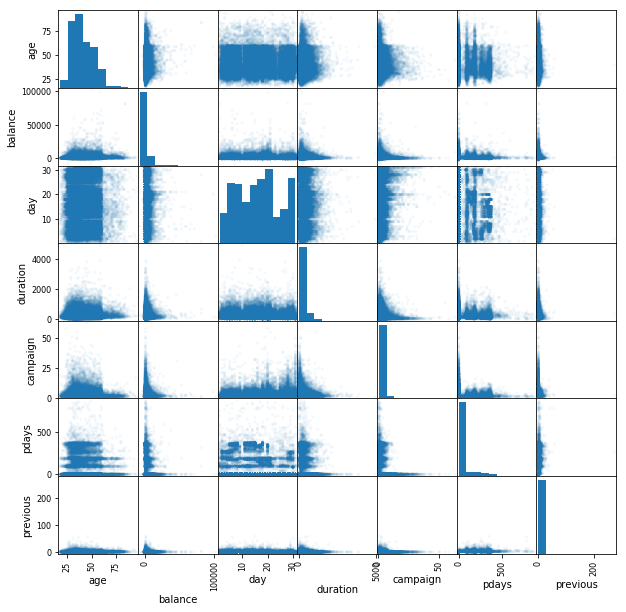

In [105]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .05, figsize = (10, 10))
pass

There is an intresting correlation between age and yerly balance: only people between 30 and 60 have early balance more than 20k.
Another bright point is that duration of the talk slightly depends on the age: young people talks much less unlike adult.

One more fact: balance depends somehow on talk duration - the higher balance person has, the shorter talk duration is. It may be explained in a way that rich people with hight balance are not intrested in term deposits.

In [106]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In general, there are no hight correlation coefficients. Balance and duration attributes mentioned above have very small correlation coefficient - only 0.03.

But correlation cofficient does not show strict attributes cohesion - it just may just indicate that there may be some dependency with some probability.

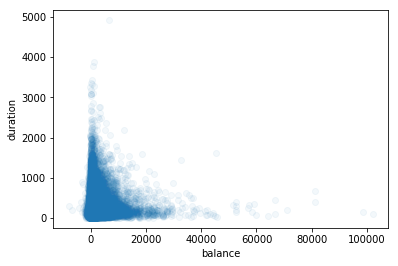

In [107]:
plt.plot(data['balance'], data['duration'], 'o', alpha = 0.05)
plt.xlabel('balance')
plt.ylabel('duration')
pass

This plot in details shows how talk duration changes with person's yerly balance.

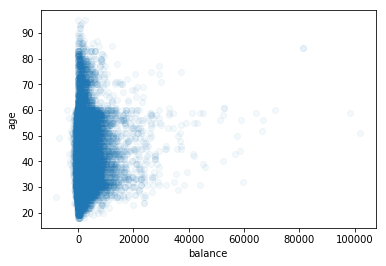

In [108]:
plt.plot(data['balance'], data['age'], 'o', alpha = 0.05)
plt.xlabel('balance')
plt.ylabel('age')
pass

This plot shows that balance depends on age of a person: people at the age between 30 and 60 years have the most highest yearly balance index.

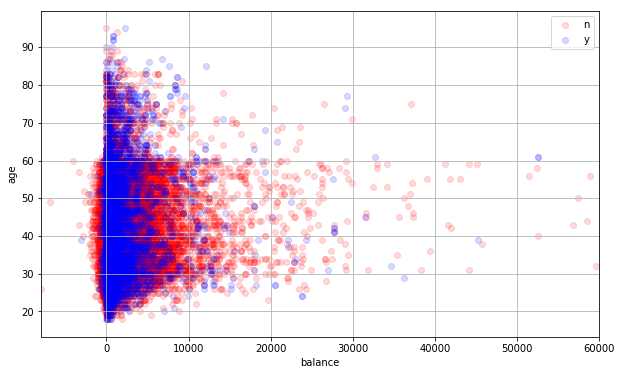

In [109]:
plt.figure(figsize = (10, 6))


plt.scatter(data[data['y'] == 'no']['balance'],
            data[data['y'] == 'no']['age'],
            alpha = 0.15,
            label = 'n',
            color = 'r')
plt.scatter(data[data['y'] == 'yes']['balance'],
            data[data['y'] == 'yes']['age'],
            alpha = 0.15,
            label = 'y',
            color = 'b')

plt.xlabel('balance')
# plt.xticks(range(18))
plt.xlim(-8000, 60000)
plt.ylabel('age')
plt.legend()
plt.grid()

This plot shows dependency between age, yearly balance and offer answer: people with high balance almost always answers 'no' on the offer of term-deposit (and their age lies between 25 and 60 years) meanwhile people with low  balance prefer to open a deposit (independently of the age).

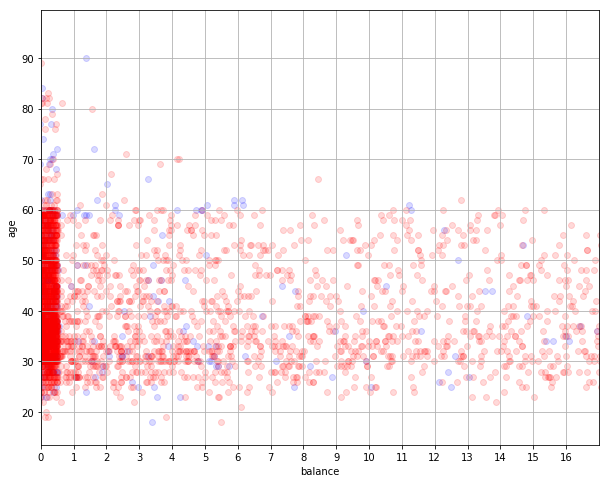

In [110]:
np.random.seed(0)
education_num_rnd = data['balance'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data['y'] == 'yes'],
            data[data['y'] == 'yes']['age'],
            alpha = 0.15,
            label = 'y',
            color = 'b')

plt.scatter(education_num_rnd[data['y'] == 'no'],
            data[data['y'] == 'no']['age'],
            alpha = 0.15,
            label = 'no',
            color = 'r')

plt.xlabel('balance')
plt.xticks(range(17))
plt.xlim(0, 17)
plt.ylabel('age')
plt.grid()

In [111]:
data.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [112]:
data.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


Тут я понял, что у меня очень мало времени и пришлось перейти на русский.

# Готовим данные

Для начала разделим признаки на категориальные и количественные

In [113]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [114]:
data[numerical_columns].count(axis = 0)
data[categorical_columns].count(axis = 0)

job          45211
marital      45211
education    45211
default      45211
housing      45211
loan         45211
contact      45211
month        45211
poutcome     45211
y            45211
dtype: int64

Заполним отсутствующие значения (если бы они были) наиболее частым вариантом для данного признака.

In [115]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

## Векторизация

Нужно что-то сделать с категориальными (номинальными) признаками

In [116]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print (binary_columns, nonbinary_columns)

['default', 'housing', 'loan', 'y'] ['job', 'marital', 'education', 'contact', 'month', 'poutcome']


Среди всех признаков категориальных признаков 6 оказались не бинарными.

Переобозначим в бинарных признаках значения на 0 и 1:

In [117]:
for v in binary_columns:
    unique_values = data[v].unique()
    data.at[data[v] == unique_values[0], v] = 0
    data.at[data[v] == unique_values[1], v] = 1

Теперь разберёмся с не бинарными признаками. Например, атрибут Education имеет 5 различных значений

In [118]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

Векторизуем один признак, принимающий 5 значений, на 5 бинарных. Сделаем это для всех не бинарных, найденных выше.

In [119]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print (data_nonbinary.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')


## Нормализация количественных признаков

In [120]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Нормализуем количественные признаки. Приведём к мат. ожиданию = 0 и дисперсии = 1.

In [121]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std()

In [122]:
data_numerical.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,2.135579e-16,-4.067535e-16,-3.063960e-14,-5.313654e-17,1.723756e-14,1.057063e-13,-1.007183e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.159970e+00,-3.081114e+00,-1.779088e+00,-1.002467e+00,-5.693443e-01,-4.114486e-01,-2.519376e-01
25%,-7.473762e-01,-4.237673e-01,-9.379923e-01,-6.025100e-01,-5.693443e-01,-4.114486e-01,-2.519376e-01
50%,-1.823386e-01,-3.002766e-01,2.326005e-02,-3.035132e-01,-2.465576e-01,-4.114486e-01,-2.519376e-01
75%,6.652178e-01,2.158719e-02,6.240428e-01,2.362344e-01,7.622910e-02,-4.114486e-01,-2.519376e-01
max,5.091346e+00,3.309441e+01,1.825608e+00,1.809450e+01,1.944343e+01,8.297339e+00,1.191347e+02


Теперь соединим все обработанные признаки.

In [123]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print (data.shape)

(45211, 49)


In [124]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,2.135579e-16,-4.067535e-16,-3.063960e-14,-5.313654e-17,1.723756e-14,1.057063e-13,-1.007183e-13,0.114375,0.215257,0.032890,...,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.108403,0.040698,0.033421,0.817478
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.318269,0.411005,0.178351,...,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.310892,0.197592,0.179735,0.386278
min,-2.159970e+00,-3.081114e+00,-1.779088e+00,-1.002467e+00,-5.693443e-01,-4.114486e-01,-2.519376e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.473762e-01,-4.237673e-01,-9.379923e-01,-6.025100e-01,-5.693443e-01,-4.114486e-01,-2.519376e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-1.823386e-01,-3.002766e-01,2.326005e-02,-3.035132e-01,-2.465576e-01,-4.114486e-01,-2.519376e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.652178e-01,2.158719e-02,6.240428e-01,2.362344e-01,7.622910e-02,-4.114486e-01,-2.519376e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.091346e+00,3.309441e+01,1.825608e+00,1.809450e+01,1.944343e+01,8.297339e+00,1.191347e+02,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и y

Уберем из выборки столбцы с ответом, а также столбцы, которые указывают на ответ.

In [125]:
X = data.drop(('y'), axis = 1) # выбрасываем столбец 'class'
y = data['y']
feature_names = X.columns

In [126]:
y.describe()

count     45211
unique        2
top           0
freq      39922
Name: y, dtype: int64

In [127]:
feature_names

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'default',
       'housing', 'loan'],
      dtype='object')

In [128]:
print(X.shape)
print(y.shape)
N, d = X.shape

(45211, 48)
(45211,)


In [129]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

y_train = list(y_train.values)
y_test = list(y_test.values)

print(N_train, N_test)

31647 13564


In [130]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import operator

Для оценки качества нашей бинарной классификации будем использовать ROC кривую. Для её построения, напишем функцию:

In [131]:
def plot_roc_curve(alg, y_test, y_score):
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = {0:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(alg + ' :receiver operating characteristic curve')
    plt.show()
    print('AUC: {0:.6f}'.format(roc_auc))

Для начала объявим все методы, которые будем использовать для классификации, а также подберём гиперпараметры, где это возможно.

## $k$NN

In [258]:
def knn(results):
    knn = KNeighborsClassifier()
    knn.set_params(n_neighbors=9)
    knn.fit(X_train, y_train)
    
    y_test_predict = knn.predict(X_test)
    err_train = np.mean(y_train != knn.predict(X_train))
    err_test  = np.mean(y_test  != y_test_predict)
    cm = confusion_matrix(y_test, y_test_predict)

    addResult('kNN', err_train, err_test, cm[1][0], cm[0][1], 'None', results)
    
    y_score = knn.predict(X_test)
    plot_roc_curve('kNN', y_test, y_score)

In [58]:
errors = []
values = range(1, 10)
for n_neighb in values:
    knn = KNeighborsClassifier(n_neighbors=n_neighb)
    knn.set_params(n_neighbors=n_neighb)   
    knn.fit(X_train, y_train)
    y_test_predict = knn.predict(X_test)
    err_train = np.mean(y_train != knn.predict(X_train))
    err_test  = np.mean(y_test  != y_test_predict)
    errors.append((n_neighb, err_train, err_test))

optimal_n_neighb = list(sorted(errors, key=operator.itemgetter(2)))[0]

In [59]:
optimal_n_neighb

(9, 0.089076373747906598, 0.096947803007962255)

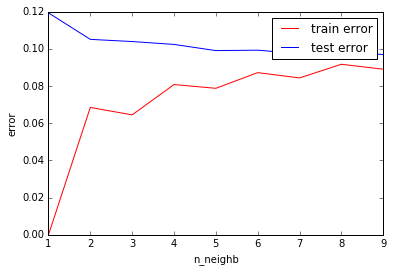

In [39]:
plt.plot(values, list(map(operator.itemgetter(1), errors)), 'r-', label='train error')
plt.plot(values, list(map(operator.itemgetter(2), errors)), 'b-', label='test error')
plt.xlabel('n_neighb')
plt.ylabel('error')
plt.legend()

### LDA

In [259]:
def lda(results):
    lda = LDA()
    lda.fit(X_train, y_train)

    y_test_predict = lda.predict(X_test)
    err_train = np.mean(y_train != lda.predict(X_train))
    err_test  = np.mean(y_test  != y_test_predict)
    cm = confusion_matrix(y_test, y_test_predict)

    addResult('LDA', err_train, err_test, cm[1][0], cm[0][1], 'None', results)

### QDA

In [260]:
def qda(results):
    qda = QDA()
    qda.fit(X_train, y_train)

    y_test_predict = qda.predict(X_test)
    err_train = np.mean(y_train != qda.predict(X_train))
    err_test  = np.mean(y_test  != y_test_predict)
    cm = confusion_matrix(y_test, y_test_predict)

    addResult('QDA', err_train, err_test, cm[1][0], cm[0][1], 'None', results)

### LogisticRegression

In [261]:
def lr(results):
    lr = LR()
    lr.fit(X_train, y_train)

    y_test_predict = lr.predict(X_test)
    err_train = np.mean(y_train != lr.predict(X_train))
    err_test  = np.mean(y_test  != y_test_predict)
    cm = confusion_matrix(y_test, y_test_predict)

    addResult('LogisticRegression', err_train, err_test, cm[1][0], cm[0][1], 'None', results)
    
    y_score = lr.predict(X_test)
    plot_roc_curve("LogRegression", y_test, y_score)

# SVC

In [262]:
def svc(results):
    svc = SVC()
    svc.fit(X_train, y_train)

    y_test_predict = svc.predict(X_test)
    err_train = np.mean(y_train != svc.predict(X_train))
    err_test  = np.mean(y_test  != y_test_predict)
    cm = confusion_matrix(y_test, y_test_predict)
    
    addResult('SVC', err_train, err_test, cm[1][0], cm[0][1], 'None', results)
    
    y_score = svc.predict(X_test)
    plot_roc_curve("SVC", y_test, y_score)

# Random Forest

In [132]:
def raf(results): 
    rf = ensemble.RandomForestClassifier(n_estimators = 560)
    rf.fit(X_train, y_train)

    y_test_predict = rf.predict(X_test)
    err_train = np.mean(y_train != rf.predict(X_train))
    err_test  = np.mean(y_test  != y_test_predict)
    cm = confusion_matrix(y_test, y_test_predict)
    
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    addResult('Random Forest', err_train, err_test, cm[1][0], cm[0][1], feature_names[indices[0]], results)

In [42]:
errors = []
values = np.concatenate((np.arange(1, 10, 1), np.arange(10, 1000, 50)))
for n_trees in values:
    rf = ensemble.RandomForestClassifier(n_estimators = n_trees)
    rf.fit(X_train, y_train)
    y_test_predict = rf.predict(X_test)
    err_train = np.mean(y_train != rf.predict(X_train))
    err_test  = np.mean(y_test  != y_test_predict)
    errors.append((n_trees, err_train, err_test))

print(list(sorted(errors, key=operator.itemgetter(2)))[0])

(560, 0.0, 0.091049837805956949)


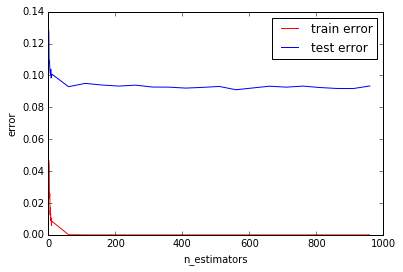

In [43]:
plt.plot(values, list(map(operator.itemgetter(1), errors)), 'r-', label='train error')
plt.plot(values, list(map(operator.itemgetter(2), errors)), 'b-', label='test error')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()

## Extremely Randomized Trees

In [273]:
def ert(results):
    ert = ensemble.ExtraTreesClassifier(n_estimators = 310)
    ert.fit(X_train, y_train)

    y_test_predict = ert.predict(X_test)
    err_train = np.mean(y_train != ert.predict(X_train))
    err_test  = np.mean(y_test  != y_test_predict)
    cm = confusion_matrix(y_test, y_test_predict)

    importances = ert.feature_importances_
    indices = np.argsort(importances)[::-1]
    addResult('Extremely Randomized Trees', err_train, err_test, cm[1][0], cm[0][1], feature_names[indices[0]], results)

In [265]:
errors = []
values = np.concatenate((np.arange(1, 10, 1), np.arange(10, 1000, 50)))
for n_trees in values:
    ert = ensemble.ExtraTreesClassifier(n_estimators = n_trees).fit(X_train, y_train)

    y_test_predict = ert.predict(X_test)
    err_train = np.mean(y_train != ert.predict(X_train))
    err_test  = np.mean(y_test  != y_test_predict)
    errors.append((n_trees, err_train, err_test))

In [38]:
print(list(sorted(errors, key=operator.itemgetter(2)))[0])

(310, 0.0, 0.097390150398112649)


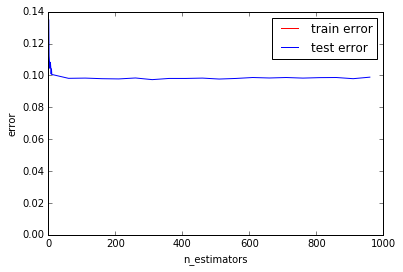

In [40]:
plt.plot(values, list(map(operator.itemgetter(1), errors)), 'r-', label='train error')
plt.plot(values, list(map(operator.itemgetter(2), errors)), 'b-', label='test error')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()

## AdaBoost

In [266]:
def ada(results):
    ada = ensemble.AdaBoostClassifier(n_estimators = 160)
    ada.fit(X_train, y_train)

    y_test_predict = ada.predict(X_test)
    err_train = np.mean(y_train != ada.predict(X_train))
    err_test = np.mean(y_test != y_test_predict)
    cm = confusion_matrix(y_test, y_test_predict)

    importances = ada.feature_importances_
    indices = np.argsort(importances)[::-1]
    addResult('AdaBoost', err_train, err_test, cm[1][0], cm[0][1], feature_names[indices[0]], results)

In [41]:
errors = []
values = np.concatenate((np.arange(1, 10, 1), np.arange(10, 1000, 50)))
for n_est in values:
    ada = ensemble.AdaBoostClassifier(n_estimators = n_est)
    ada.fit(X_train, y_train)

    y_test_predict = ada.predict(X_test)
    err_train = np.mean(y_train != ada.predict(X_train))
    err_test = np.mean(y_test != y_test_predict)
    errors.append((n_est, err_train, err_test))

print(list(sorted(errors, key=operator.itemgetter(2)))[0])

(160, 0.095964862388220051, 0.096652904747861992)


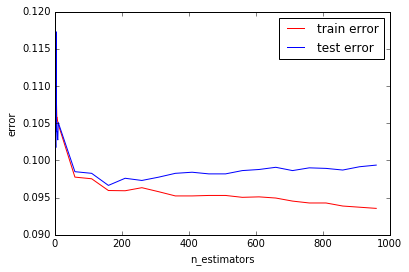

In [43]:
plt.plot(values, list(map(operator.itemgetter(1), errors)), 'r-', label='train error')
plt.plot(values, list(map(operator.itemgetter(2), errors)), 'b-', label='test error')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()

## GBT

In [267]:
def gbt(results):
    gbt = ensemble.GradientBoostingClassifier(n_estimators = 460)
    gbt.fit(X_train, y_train)

    y_test_predict = gbt.predict(X_test)
    err_train = np.mean(y_train != gbt.predict(X_train))
    err_test = np.mean(y_test != y_test_predict)
    cm = confusion_matrix(y_test, y_test_predict)

    importances = gbt.feature_importances_
    indices = np.argsort(importances)[::-1]
    addResult('GBT', err_train, err_test, cm[1][0], cm[0][1], feature_names[indices[0]], results)

In [45]:
errors = []
values = np.concatenate((np.arange(1, 10, 1), np.arange(10, 1000, 50)))
for n_est in values:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = n_est)
    gbt.fit(X_train, y_train)

    y_test_predict = gbt.predict(X_test)
    err_train = np.mean(y_train != gbt.predict(X_train))
    err_test = np.mean(y_test != y_test_predict)
    errors.append((n_est, err_train, err_test))

print(list(sorted(errors, key=operator.itemgetter(2)))[0])

(460, 0.072866306442948781, 0.090533765850781475)


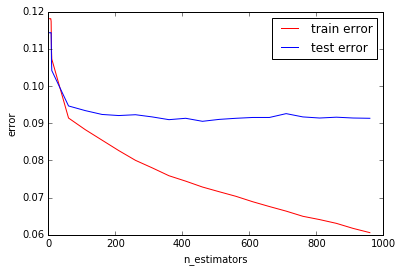

In [46]:
plt.plot(values, list(map(operator.itemgetter(1), errors)), 'r-', label='train error')
plt.plot(values, list(map(operator.itemgetter(2), errors)), 'b-', label='test error')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()

### DecisionTree

In [268]:
def dtc(results):
    dtc = DecisionTreeClassifier(max_depth=8) # наилучшие результаты при 3

    dtc.fit(X_train, y_train)

    y_test_predict = dtc.predict(X_test)
    err_train = np.mean(y_train != dtc.predict(X_train))
    err_test  = np.mean(y_test  != y_test_predict)
    cm = confusion_matrix(y_test, y_test_predict)

    importances = dtc.feature_importances_
    indices = np.argsort(importances)[::-1]
    addResult('Decision Tree', err_train, err_test, cm[1][0], cm[0][1], feature_names[indices[0]], results)

In [48]:
errors = []
for n_depth in np.arange(1, 100, 1):
    dtc = DecisionTreeClassifier(max_depth=n_depth) # наилучшие результаты при 3

    dtc.fit(X_train, y_train)

    y_test_predict = dtc.predict(X_test)
    err_train = np.mean(y_train != dtc.predict(X_train))
    err_test  = np.mean(y_test  != y_test_predict)
    errors.append((n_depth, err_train, err_test))

print(list(sorted(errors, key=operator.itemgetter(2)))[0])

(8, 0.08297784940120706, 0.09753759952816278)


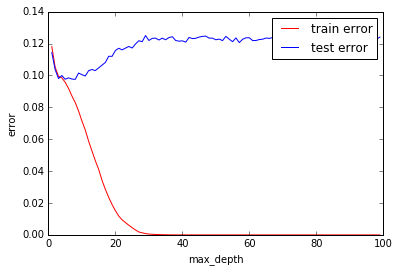

In [49]:
plt.plot(np.arange(1, 100, 1), list(map(operator.itemgetter(1), errors)), 'r-', label='train error')
plt.plot(np.arange(1, 100, 1), list(map(operator.itemgetter(2), errors)), 'b-', label='test error')
plt.xlabel('max_depth')
plt.ylabel('error')
plt.legend()

### Naive Bayes

In [269]:
def naive(results):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    y_test_predict = gnb.predict(X_test)
    err_train = np.mean(y_train != gnb.predict(X_train))
    err_test  = np.mean(y_test  != y_test_predict)
    cm = confusion_matrix(y_test, y_test_predict)
    
    print(err_test)

    addResult('Naive Bayes', err_train, err_test, cm[1][0], cm[0][1], None, results)
    
    y_score = gnb.predict(X_test)
    plot_roc_curve('Naive Bayes', y_test, y_score)

### Тесты

In [275]:
results = pd.DataFrame([],[], ['Method', 'Train error', 'Test error', 'False negative', 'False positive', 'Most important attribute'])
results # for results

,Method,Train error,Test error,False negative,False positive,Most important attribute


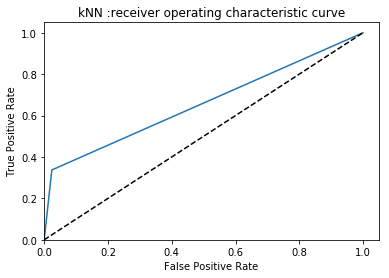

AUC: 0.656656


/home/netcracker.com/mavo0215/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/netcracker.com/mavo0215/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


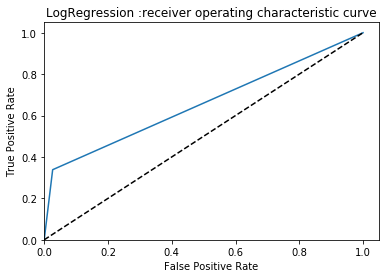

AUC: 0.655968


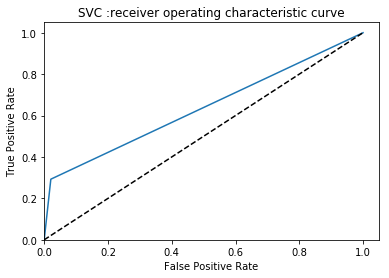

AUC: 0.635952
0.147080507225


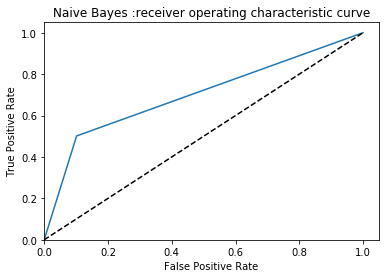

AUC: 0.699944


,Method,Train error,Test error,False negative,False positive,Most important attribute
8,GBT,0.072866,0.090460,810,417,duration
5,Random Forest,0.000000,0.092082,931,318,duration
7,AdaBoost,0.095965,0.096653,955,356,duration
0,kNN,0.089076,0.096948,1028,287,None
9,Decision Tree,0.082915,0.097390,948,373,duration
1,LDA,0.099251,0.097832,859,468,None
6,Extremely Randomized Trees,0.000000,0.098938,1003,339,duration
3,LogisticRegression,0.097166,0.099160,1026,319,None
4,SVC,0.100610,0.099307,1097,250,None
10,Naive Bayes,0.145985,0.147081,773,1222,None


In [276]:
knn(results)
lda(results)
qda(results)
lr(results)
svc(results)
raf(results)
ert(results)
ada(results)
gbt(results)
dtc(results)
naive(results)
results.sort_values('Test error')

В таблице строки упорядочены по колонке Test error по убыванию.
В итоге получаем следующие результаты: все методы, кроме QDA, отрабатывают достаточно хорошо - ошибка не превышает 1-го процента на тестовых данных. Наиболее хорошо отрабатывает GBT, Random Forest, чуть хуже Extremely Randomized Trees и LDA, однако меньше, чем на 1%.

Также в таблице видеть ошибки первого и второго рода. False negative - когда элемент принадлежит классу 1, но мы это отвергли, а False positive - когда элемент не класса 1, но мы приняли его за таковой. Ошибки первого и второго рода "компенсируют" друг друга во всех методах - если алгоритм делает мало ошибок второго рода, то он обязательно совершает много ошибок первого рода. Это может сыграть сколь-нибудь важную роль при выборе алгоритма для классификации на этих данных.

Помимо прочего, в таблице есть также колонка "Most important attribute", которая показывает, на что больше всего полагался метод при определении принадлежности к классу.

Попробуем отбросить наиболее важный атрибут для самых эффективных методов (duration) и запустить тесты ещё раз

In [277]:
X = X.drop(('duration'), axis = 1) # выбрасываем столбец 'class'
y = data['y']
feature_names = X.columns

In [278]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

y_train = list(y_train.values)
y_test = list(y_test.values)

print(N_train, N_test)

31647 13564


In [279]:
results_without_imp = pd.DataFrame([],[], ['Method', 'Train error', 'Test error', 'False negative', 'False positive', 'Most important attribute'])
results_without_imp # for results

,Method,Train error,Test error,False negative,False positive,Most important attribute


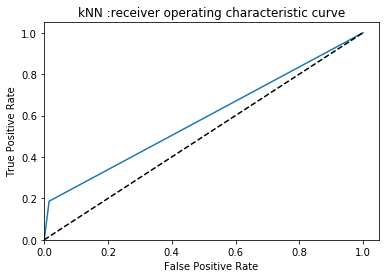

AUC: 0.585424


/home/netcracker.com/mavo0215/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/netcracker.com/mavo0215/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


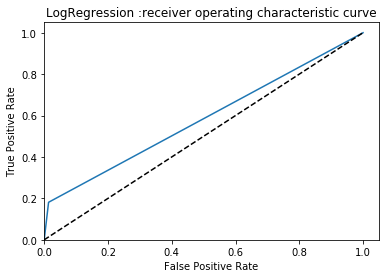

AUC: 0.583719


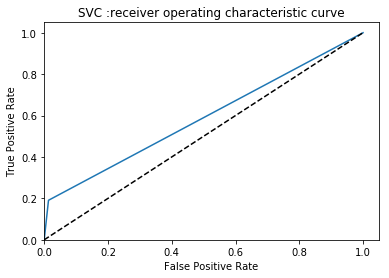

AUC: 0.588680
0.156443526983


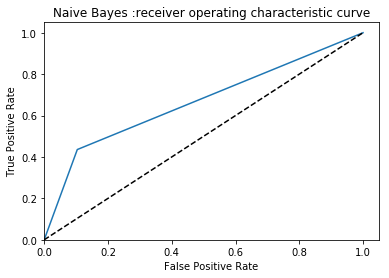

AUC: 0.666022


In [280]:
knn(results_without_imp)
lda(results_without_imp)
qda(results_without_imp)
lr(results_without_imp)
svc(results_without_imp)
raf(results_without_imp)
ert(results_without_imp)
ada(results_without_imp)
gbt(results_without_imp)
dtc(results_without_imp)
naive(results_without_imp)

In [281]:
results.sort_values('Test error')

,Method,Train error,Test error,False negative,False positive,Most important attribute
8,GBT,0.072866,0.090460,810,417,duration
5,Random Forest,0.000000,0.092082,931,318,duration
7,AdaBoost,0.095965,0.096653,955,356,duration
0,kNN,0.089076,0.096948,1028,287,None
9,Decision Tree,0.082915,0.097390,948,373,duration
1,LDA,0.099251,0.097832,859,468,None
6,Extremely Randomized Trees,0.000000,0.098938,1003,339,duration
3,LogisticRegression,0.097166,0.099160,1026,319,None
4,SVC,0.100610,0.099307,1097,250,None
10,Naive Bayes,0.145985,0.147081,773,1222,None


In [282]:
results_without_imp.sort_values('Test error')

,Method,Train error,Test error,False negative,False positive,Most important attribute
4,SVC,0.108383,0.104468,1255,162,None
8,GBT,0.090435,0.104836,1146,276,balance
5,Random Forest,0.000000,0.104910,1183,240,balance
3,LogisticRegression,0.108825,0.105795,1270,165,None
0,kNN,0.101179,0.106753,1262,186,None
7,AdaBoost,0.107277,0.106974,1248,203,balance
9,Decision Tree,0.095807,0.107417,1235,222,poutcome_success
1,LDA,0.111764,0.109112,1103,377,None
6,Extremely Randomized Trees,0.000000,0.112946,1139,393,balance
10,Naive Bayes,0.156318,0.156444,875,1247,None


Интересно видеть, что:
    1. Один из лучших результатов показал GBT, как и в предыдущем случае. На том же уровне отработали SVC и Random Forest.
    2. Decision Tree, который показал один из лучших результатов, выбрал за главный атрибут poutcome_success, в отличие от всех других алгоритмов, выбравших balance
    3. В среднем увеличилось количество ошибок 1го рода, однако уменьшилось количество ошибок второго рода у каждого из методов 
    4. Произошли некоторые перестановки в рейтинге алгоритмов, однако ошибка у каждого из алгоритмов увеличилась всего на 1-2% (за исключением QDA, ошибка у которого выросла до 40%)

Можно сделать вывод, что на данном датасете все алгоритмы, кроме QDA, показывают себя хорошо и неплохо классифицируют объекты со средней точностью 90%.

In [161]:
def addResult(name, err_tr, err_ts, fn, fp, most_imp, res):
    res.loc[len(res)] = [name, err_tr, err_ts, fn, fp, most_imp]

# Module 2

Воспользуемся встроенным в sklearn методом PCA. Обучим классификатор Random Forest, как один из самых эффективных, на результате работы метода главных компонент для компонент от 6 до 44 с шагом 2, а затем сравним для каждого из запусков процент ошибок на тренировочной выборке 

In [133]:
from sklearn.decomposition import PCA

In [141]:
errors = []
values = np.arange(6, 44, 2)
for pca_components in values:
    pca = PCA(n_components=pca_components)
    pca.fit(X_train)
    # transform train set
    X_pca = pd.DataFrame(pca.transform(X_train), columns=['PCA%i' % i for i in range(pca.n_components)], index=X_train.index)
    # transform test set
    X_test_pca = pd.DataFrame(pca.transform(X_test), columns=['PCA%i' % i for i in range(pca.n_components)], index=X_test.index)
    
    rf = ensemble.RandomForestClassifier(n_estimators = 560) # best number of estimators
    rf.fit(X_pca, y_train)
    y_test_predict = rf.predict(X_test_pca)
    err_train = np.mean(y_train != rf.predict(X_pca))
    err_test  = np.mean(y_test  != y_test_predict)
    print("Finished for " + str(pca_components) + "; Err. train: " + str(err_train) + "; Err. test: " + str(err_test))
    
    errors.append((pca_components, err_train, err_test))
    
print(list(sorted(errors, key=operator.itemgetter(2)))[0])

Finished for 6; Err. train: 0.0; Err. test: 0.109554703627
Finished for 8; Err. train: 0.0; Err. test: 0.105499852551
Finished for 10; Err. train: 0.0; Err. test: 0.104393984075
Finished for 12; Err. train: 0.0; Err. test: 0.104541433206
Finished for 14; Err. train: 0.0; Err. test: 0.102772043645
Finished for 16; Err. train: 0.0; Err. test: 0.103804187555
Finished for 18; Err. train: 0.0; Err. test: 0.10387791212
Finished for 20; Err. train: 0.0; Err. test: 0.1032881156
Finished for 22; Err. train: 0.0; Err. test: 0.101739899735
Finished for 24; Err. train: 0.0; Err. test: 0.0998230610439
Finished for 26; Err. train: 0.0; Err. test: 0.100855204954
Finished for 28; Err. train: 0.0; Err. test: 0.0993069890888
Finished for 30; Err. train: 0.0; Err. test: 0.097021527573
Finished for 32; Err. train: 0.0; Err. test: 0.0959156590976
Finished for 34; Err. train: 0.0; Err. test: 0.0968740784429
Finished for 36; Err. train: 0.0; Err. test: 0.0960631082277
Finished for 38; Err. train: 0.0; Err. t

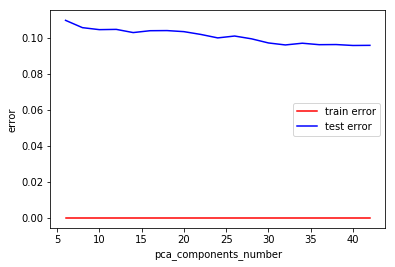

In [142]:
plt.plot(values, list(map(operator.itemgetter(1), errors)), 'r-', label='train error')
plt.plot(values, list(map(operator.itemgetter(2), errors)), 'b-', label='test error')
plt.xlabel('pca_components_number')
plt.ylabel('error')
plt.legend()

Как видно из графика и результатов выше, выделение главных компонент не дало какого-либо существенного прироста. Ошибка 9,62% достигается при выделении 40 главных компонент, однако это всё равно хуже результата в 9,2%, полученного при обучении случайного леса на полной выборке.
Это может быть обусловлено особенностями датасета, над которым производился анализ.